Install requirements.

In [ ]:
!pip install -r requirements.txt -qq

Download a wandb model below.

In [ ]:
import wandb

# define wandb environment
%env WANDB_LOG_MODEL=true
%env WANDB_API_KEY=53c099408fab02d1e4fff7386e8dfc1e759689a1

In [ ]:
# download wandb model
import wandb
run = wandb.init()
artifact = run.use_artifact('oumar-kane-team/bart-custom-train-fw-translation-bayes-hpsearch-v5/model_hnkyvzn:v0', type='dataset')
artifact_dir = artifact.download()

In [ ]:
wandb.finish()

In [ ]:
# transfer the model inside the artifact to data/checkpoints/name_of_model
def transfer_model(artifact_dir, model_name):
    import os
    import shutil
    import glob

    # transfer the model inside the artifact to data/checkpoints/name_of_model
    os.makedirs(f'data/checkpoints/{model_name}', exist_ok=True)
    for file in glob.glob(f'{artifact_dir}/*'):
        shutil.copy(file, f'data/checkpoints/{model_name}')

    # delete the artifact
    shutil.rmtree(artifact_dir)

# transfer the model inside the artifact to data/checkpoints/name_of_model
transfer_model(artifact_dir, 'fw_bart_custom_train_v5_checkpoints')

-----------------

Send a directory as a wandb artifact.

In [ ]:
# initialize a project and add a directory as artifact to wandb 
def add_directory(directory, artifact_name, project: str = 'fw_artifacts', entity: str = 'oumar-kane-team'):
    
    wandb.init(project=project, entity=entity)
    
    # add a directory as artifact to wandb
    artifact = wandb.Artifact(artifact_name, type='dataset')
    artifact.add_dir(directory)
    run.log_artifact(artifact)
    
    wandb.finish()

In [1]:
import torch

c:\Users\Oumar Kane\AppData\Local\pypoetry\Cache\virtualenvs\pytorch1-HleOW5am-py3.10\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
torch.cuda.get_device_name()

'NVIDIA GeForce RTX 2060'

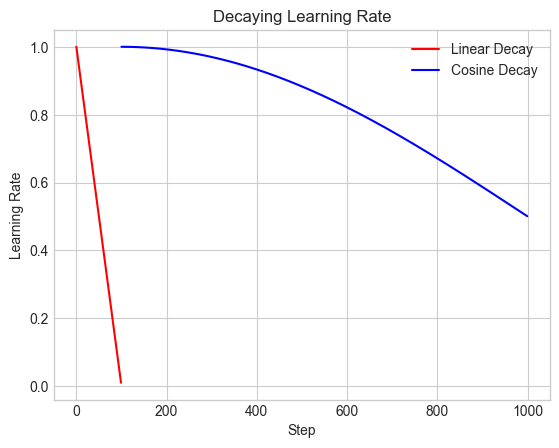

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# initialize the learning rate and the number of steps
lr = 1
num_steps = 1000

# the following function calculate the linear decay rate
def linear_decay(step, num_steps, lr):
    return lr * (1.0 - step / num_steps)

# the following function calculate the cosine decay rate
def cosine_decay(step, num_steps, lr):
    prog = lr * (step / num_steps)
    return 0.5 * (1.0 + np.cos(np.pi * ((0.5 * prog) % 1.0)))

# trace the curve of the learning rate using 0.1 percent of the steps for linear decay and the rest for cosine decay
linear_lr = {'step': [], 'lr': []}
cosine_lr = {'step': [], 'lr': []}
for step in range(num_steps):
    if step < num_steps * 0.1:
        linear_lr['step'].append(step)
        linear_lr['lr'].append(linear_decay(step, num_steps * 0.1, lr))
    else:
        cosine_lr['step'].append(step)
        cosine_lr['lr'].append(cosine_decay(step - num_steps * 0.1, num_steps - num_steps * 0.1, lr))

# plot the linear lr with red color and the cosine one with blue color
plt.plot(linear_lr['step'], linear_lr['lr'], color='red')
plt.plot(cosine_lr['step'], cosine_lr['lr'], color='blue')
plt.xlabel('Step')
plt.ylabel('Learning Rate')
plt.title('Decaying Learning Rate')
plt.legend(['Linear Decay', 'Cosine Decay'])
plt.show()
